In [1]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset

 95% 292M/307M [00:01<00:00, 247MB/s]
100% 307M/307M [00:01<00:00, 202MB/s]


In [3]:
import zipfile
local_zip = '/content/horses-or-humans-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import tensorflow.keras as keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator

validation_generator = validation_datagen.flow_from_directory(
        '/content/horse-or-human/horse-or-human/validation',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

<ipython-input-11-48447cb65581>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 21s 1s/step - loss: 0.7332 - acc: 0.5050 - val_loss: 0.6810 - val_acc: 0.5000
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.6906 - acc: 0.5684 - val_loss: 0.6103 - val_acc: 0.7344
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.8415 - acc: 0.6752 - val_loss: 0.6044 - val_acc: 0.6328
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 0.7300 - acc: 0.7731 - val_loss: 0.7392 - val_acc: 0.5820
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.4382 - acc: 0.8287 - val_loss: 1.0828 - val_acc: 0.6211
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.2945 - acc: 0.8721 - val_loss: 1.3768 - val_acc: 0.7812
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.3485 - acc: 0.8776 - val_loss: 0.7740 - val_acc: 0.8164
Epoch 8/10
8/8 [==============================] - 8s 1s/step - loss: 0.2515 - acc: 0.9166 - val_loss: 0.5315 

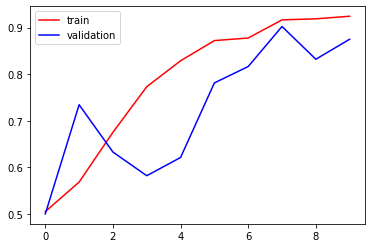

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'],color='red',label='train')
plt.plot(history.history['val_acc'],color='blue',label='validation')
plt.legend()
plt.show()

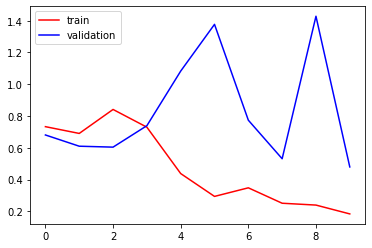

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

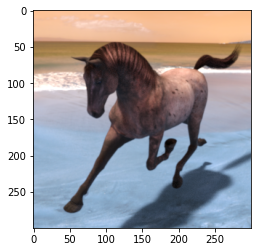

In [27]:
#Fetcing Horse image:
test_img = cv2.imread('/content/horse-or-human/horse-or-human/train/horses/horse05-5.png')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(300, 300))
test_input = test_img.reshape((1,300, 300,3))

In [30]:
#Predict for Horse:

classes = model.predict(test_input)
if classes[0]>0.5:
    print(" Image is a human")
else:
    print(" Image is a Horse")

1/1 [==============================] - 0s 33ms/step
 Image is a Horse


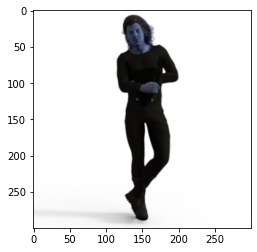

In [24]:
#Fetcing Human image:

test_img = cv2.imread('/content/horse-or-human/horse-or-human/validation/humans/valhuman05-20.png')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(300, 300))
test_input = test_img.reshape((1,300, 300,3))

In [25]:
#predict for Human:

classes = model.predict(test_input)
if classes[0]>0.5:
    print(" Image is a human")
else:
    print(" Image is a horse")

1/1 [==============================] - 0s 38ms/step
 Image is a human
